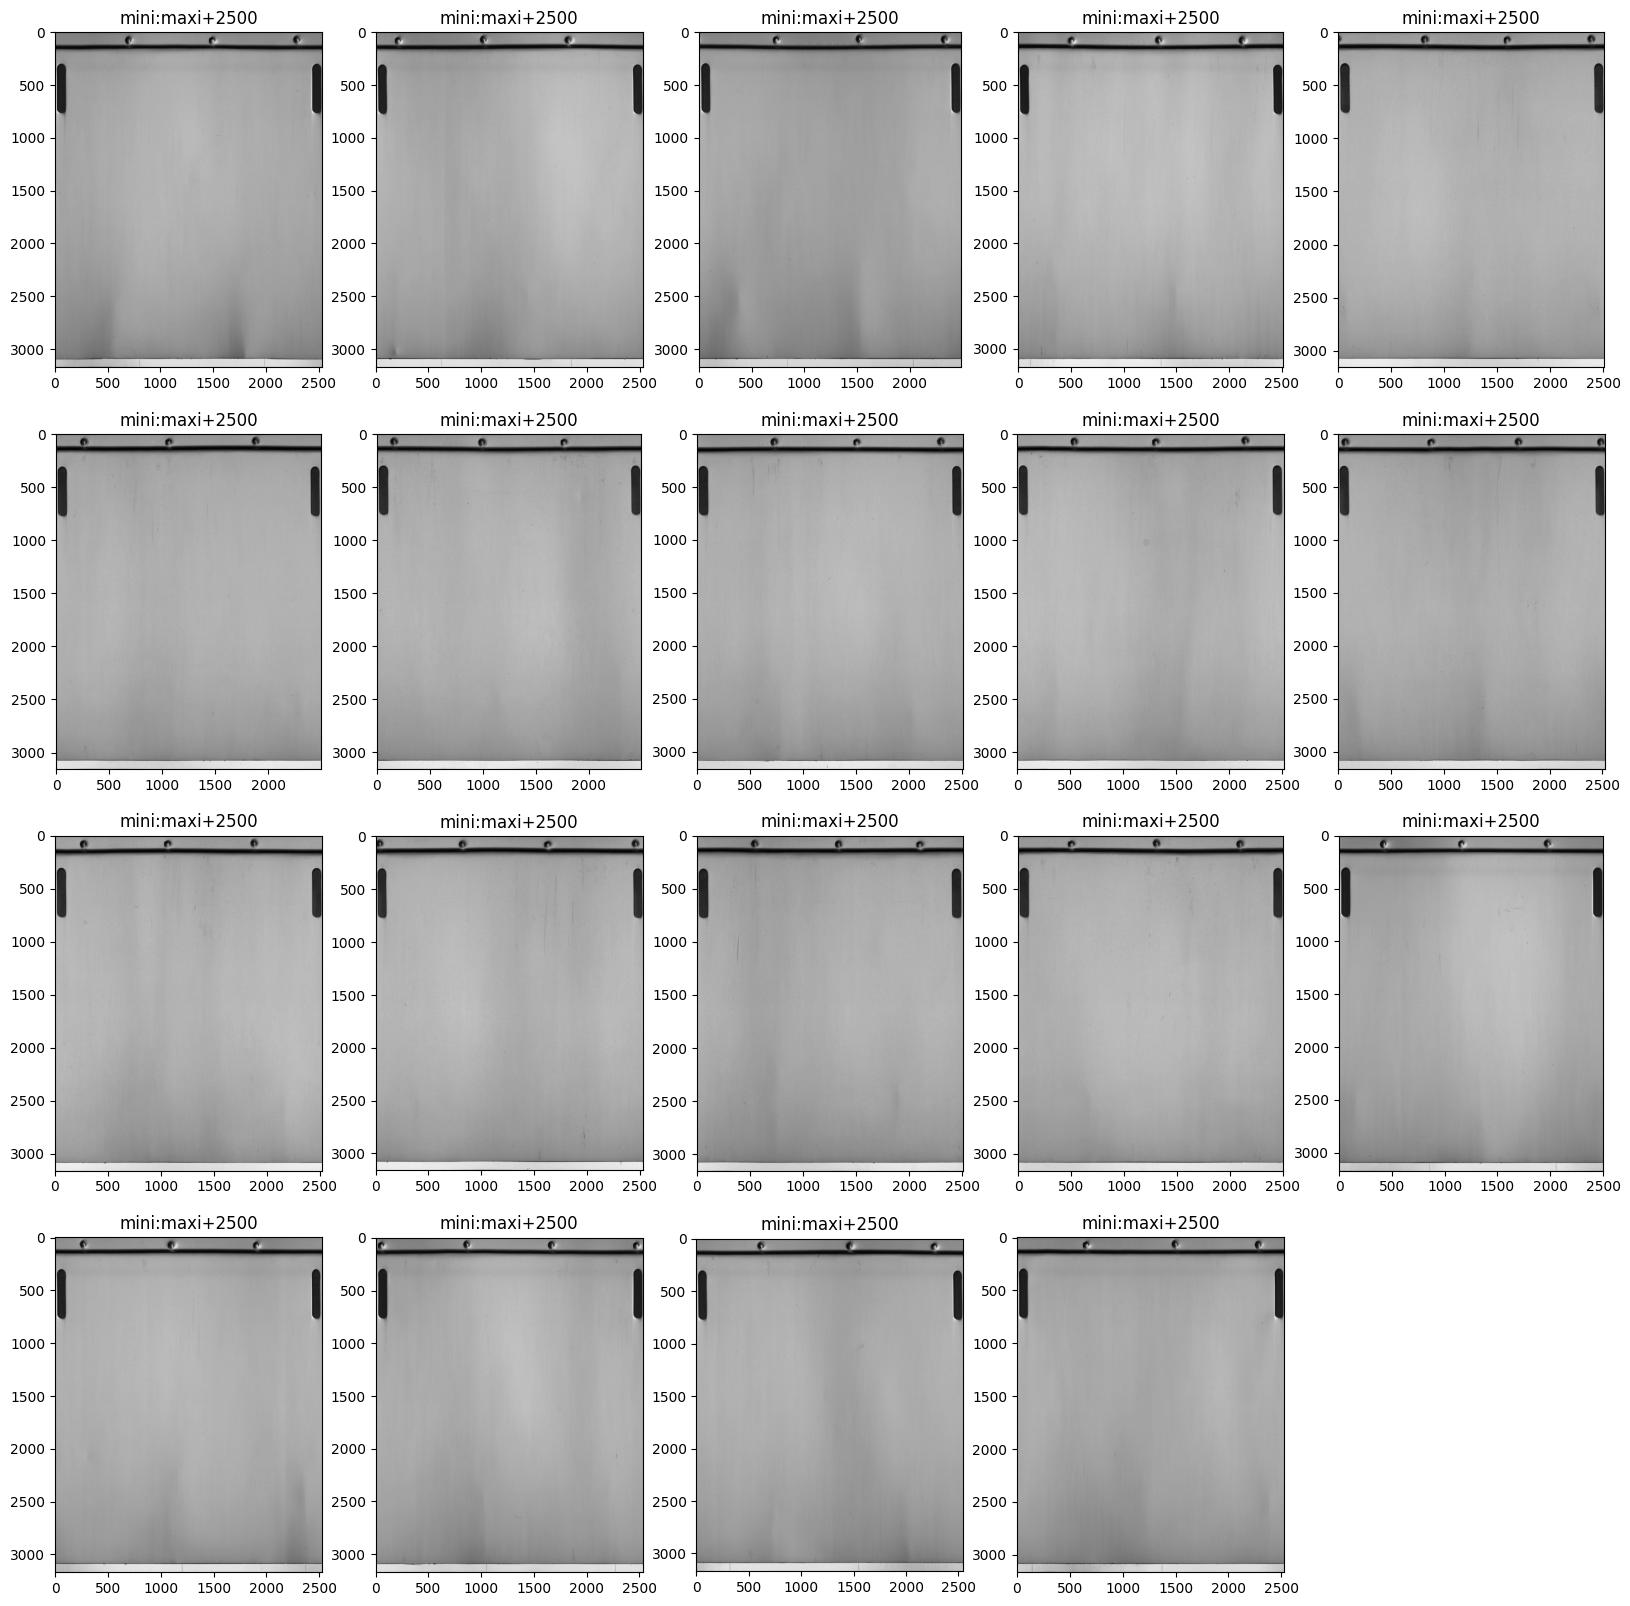

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from pathlib import Path


base_path = "/Users/gwonsmpro/Documents/GitHub/Utils/0907"

img_list = Path(base_path).glob("*.png")
# len(list(img_list))

plt.figure(figsize=[20,20])

for idx, img in enumerate(img_list):
    img = torch.tensor(cv2.imread(str(img), 0))

    # ! 상단
    top_projection_h = img[:500, :].sum(dim=1)
    top_peak_h = torch.diff(top_projection_h)

    bottom_projection_h = img[2500:, :].sum(dim=1)
    bottom_peak_h = torch.diff(bottom_projection_h)

    mini = min(top_peak_h.argmin(), top_peak_h.argmax()) # * mini로 설정하면 상단 검은색 crop 
    maxi = max(bottom_peak_h.argmin(), bottom_peak_h.argmax())

    # ! 하단 
    # print(mini, maxi)

    # plt.figure(figsize=[20,20])

    # plt.subplot(4,5,i)
    # plt.title("mini: ")
    # plt.imshow(img[mini:, :], cmap="gray")
    

    # plt.subplot(4,5,i)
    # plt.title(":maxi+2500")
    # plt.imshow(img[:maxi+2500, :], cmap="gray")

    plt.subplot(4,5,idx+1)
    plt.title("mini:maxi+2500")
    plt.imshow(img[mini:maxi+2500, :], cmap='gray')

plt.show()